# Peakfit class example
Fitting is based on the LMfit library: https://lmfit.github.io/lmfit-py/index.html

In [1]:
from nasagamma import spectrum as sp
import numpy as np
import pandas as pd
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf


# dataset 1
file = "data/SSR-mcnp.hdf"
df = pd.read_hdf(file, key='data')
df = df.iloc[1:,:]


cts_np = df.cts.to_numpy() * 1e8
erg = np.array(df.index)

# Required input parameters (in channels)
fwhm_at_0 = 1.0
ref_fwhm = 31
ref_x = 1220
min_snr = 1

In [3]:
# instantiate a Spectrum and a peaearch object
spect = sp.Spectrum(counts=cts_np, energies=erg)
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=min_snr)

We can now define a background type: linear, quadratic, exponential, or any other n-degree polynomial.
We also define a range of x-values to perform the fit

In [4]:
# peakfit class
bkg0 = 'poly2'
xrange = [2.6, 4]

In [5]:
fit = pf.PeakFit(search, xrange, bkg=bkg0)

Working with energy values
Found 7 peak(s) within range [2.6, 4]
Fit succeeded.


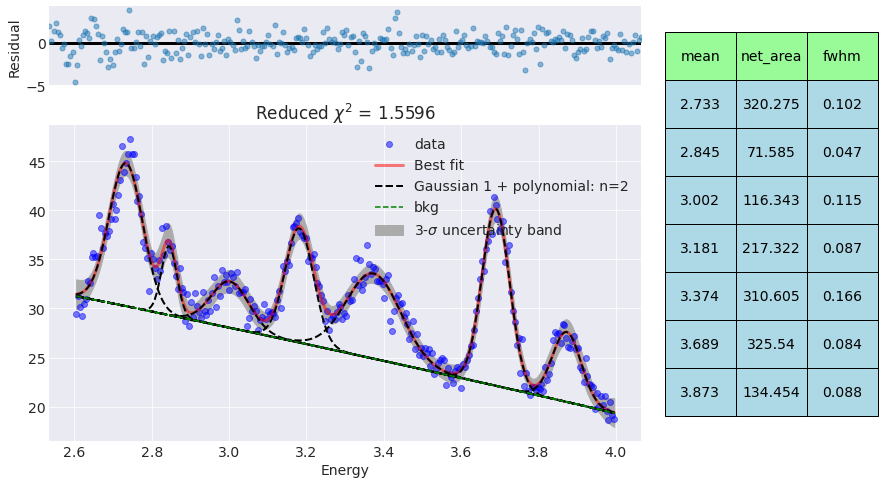

In [6]:
fit.plot(plot_type="full", legend='on')

One can try changing the x-range and background type and see how things change.